In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [2]:
Ts=collect(150.01:50.0:1200.01)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-1.5e20]#,-7.3e19,-2.0e19,-0.15e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#,1e17,1e17,1e17]#,1e17]
xs=[0.287]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=5.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x
alphanp=0.2#1/EgSiGe([Ts[1],xs[1]])


effMassV(var)=-1.2*me
effMassC(var)=0.427*me#1.4/6^(2/3)*me#0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),alphanp,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    Da=8.0
    Dv=3.0
    if band==bandC
        return [Da,Dv]#10.5#15.0
    end
    if band==bandV        
        return [Dv,Da]#7.0
    end
end
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],Deftemp(var[6])[2],var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (i,iT) in enumerate(Ts)
    for (k,kx) in enumerate(xs) 
        for (j,jn) in enumerate(numofn)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
        end
    end
end
#println("-2")
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end

 17.698027 seconds (94.53 M allocations: 25.646 GB, 16.87% gc time)


In [4]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
thetaSiL=586.0 # K 
thetaSiT=240.0 # K
vSiL=8430.0    # m/s
vSiT=5840.0    # m/s
vGeL=4920.0    # m/s
vGeT=3540.0    # m/s
gammaL=0.9
gammaT=0.9
MSi=4.6637e-26 # kg
MGe=1.206e-25  # kg
VSi=2.0024e-29 #m3
VGe=2.2636e-29 #m3

Eep=3.4*q
xsp=xs[1]
Tp=300.0
p=1.0
D=20e-9
NP=0.0
a=1.0
alpha=0.5 #specularity factor
d=97.0e-9#

#println("1")

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, xsp,
    thetaSiL, thetaSiT, thetaSiT, MSi,   MGe, 
    VSi, a, T_EF_Dict_Array, Eep, alpha, 
    d, thetaSiL, thetaSiT, vSiL, vSiT, 
    vGeL, vGeT, p, NP,Tsindex=1,
    numberofnindex=1,xsindex=1]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHNTf(var)=tauPH_NT(var[4],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))

tauPHULf(var)=tauPH_U(var[3],var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]),var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]),var[18])

tauPHALLLf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHALLTf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))

tauPHeLf(var)=tauPH_e(var[14],md,MSiGe(var[5])/VSiGe(var[5]),(var[13][var[26],var[27]])[var[2]],var[1],var[2],
vSiGeL_PH(var[5]))
tauPHeTf(var)=tauPH_e(var[14],md,MSiGe(var[5])/VSiGe(var[5]),(var[13][var[26],var[27]])[var[2]],var[1],var[2],
vSiGeT_PH(var[5]))

tauPHBLf(var)=tauPH_B(vSiGeL_PH(var[5]),var[14],var[15])
tauPHBTf(var)=tauPH_B(vSiGeT_PH(var[5]),var[14],var[15])
#println("3")
tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHALLLf,tauPHeLf],vartauPH0)#,tauPH_eLf ,tauPHALLLf ,tauPHBLf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHALLLf,tauPHeLf],vartauPH0) #,tauPHALLLf,tauPH_eLf] ,tauPHBLf

tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf

tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [5]:
tau=0
tau+=1

1

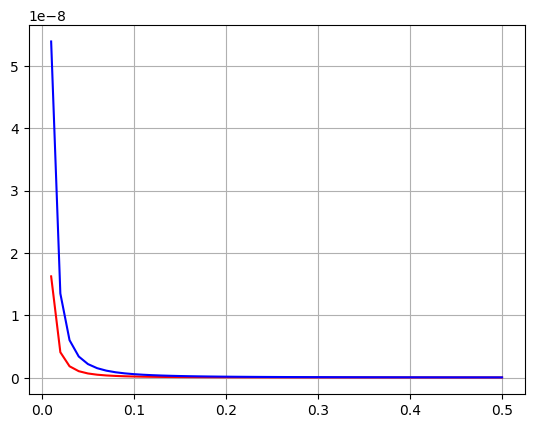

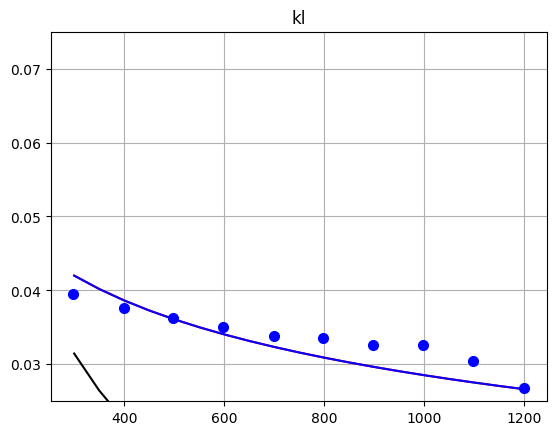

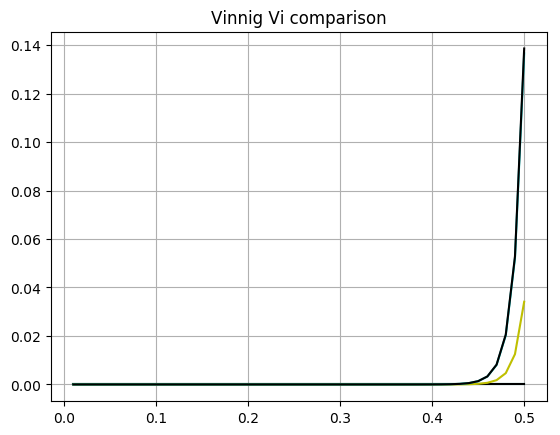

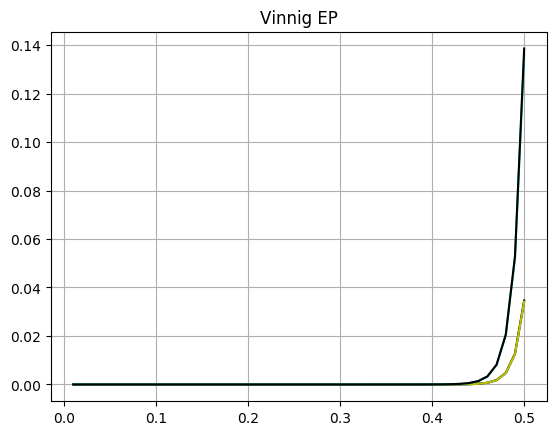

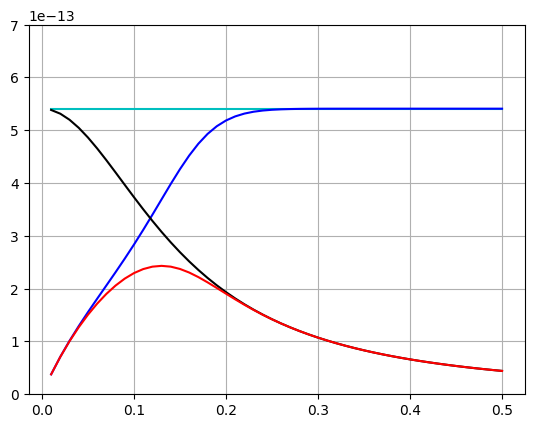

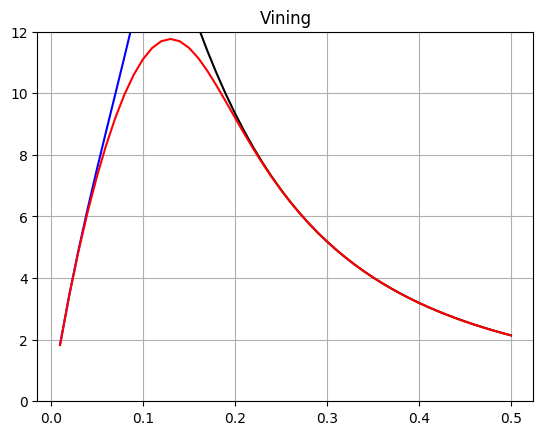

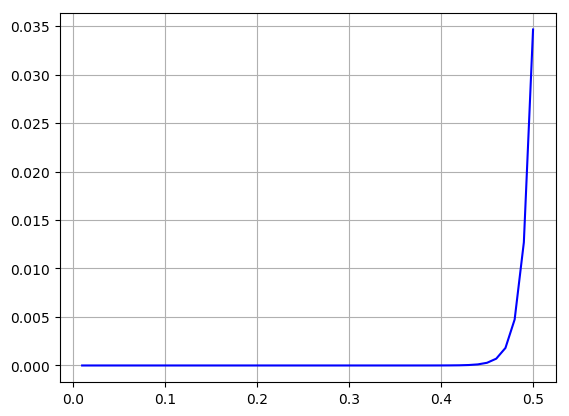

In [6]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2.*intx.^2./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=6
    ex1=1+exp(-alphat*y+eta-D*alphat*x.*x+alphat.*x/2)
    ex2=1+exp(-alphat*y+eta-D*alphat*x.*x-alphat.*x/2)    
    ext=ex1./ex2
    logt=log(ext)
    return 1./(lambda*(A*Eep^2/alphat).*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1./(6.17e11*theta*GM.*intx.^4)
end
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
function tauPH_U_VT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,theta::Float64,
omegaD::Float64,beta::Float64,delta::Float64)#intx is different from x in oither phonon calculations intx=omega/omegaD
    bb=20*pi/3*hbar*6.02e23*(6*pi*pi/4)^(1/3)
    M=M/1000
    deltacgs=delta
    #println("bb ",bb)
    return 1./(bb*(1+beta*5/9)/(1+beta)*gamma^2/M/deltacgs^2*(T/theta)^3.*intx.^2)    
end
function tauPH_C_VT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,theta::Float64,
omegaD::Float64,beta::Float64,delta::Float64)#intx is different from x in oither phonon calculations intx=omega/omegaD
   tau_u=tauPH_U_VT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,theta::Float64,
omegaD::Float64,beta::Float64,delta::Float64)#intx is different from x in oither phonon calcu
    return tau_u#1./(1./(tau_u/beta)+1./tau_u)    
end
function tauPH_PD_VT(GM::Float64,Tt::Float64,intx::Array{Float64},vtt::Float64,delta::Float64)
    return 1./(GM/4/pi*(delta/vtt)^3*(kB*Tt/hbar)^4.*intx.^4)
end
function tauPH_EP_VT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,v::Float64,T::Float64,d::Float64)
    ts=md*v*v/(2*kB*T)
    Efst=Ef#*q/kB/T
    ex1=(1+exp(-ts+Efst-x.*x/16/ts+x/2))
    ex2=(1+exp(-ts+Efst-x.*x/16/ts-x/2))    
    return 1./((Eep^2*md^3*v)/(4*pi*hbar^4*d*ts).*log(ex1./ex2))
end

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
function tauPH_NLT(gamma::Float64,V::Float64,x::Array{Float64},T::Float64,M::Float64,v::Float64)
    
    return M*v^5*hbar^4./(kB^5*gamma^2*V*x.*x*T^5)    
end
function tauPH_UT(gamma::Float64,x::Array{Float64},T::Float64,M::Float64,v::Float64,theta::Float64)   
    return 1./((hbar*gamma^2*kB^2.*x.^2*T^3*exp(-theta/3/T)/(M*v^2*theta*hbar^2)))
end
function tauPH_ALLT(Gamma::Float64,MI::Float64,MII::Float64,y::Float64,V::Float64,
    x::Array{Float64},T::Float64,M::Float64,v::Float64)
     GammaT=(1-y)*((MI-M)/M)^2+y*((MII-M)/M)^2
    return 1./(Gamma*V/v^3./4./pi)./(kB*T*x/hbar).^4 #4*pi*v^3*hbar^4./(Gamma*V*(kB*T*x).^4)
end
function tauPH_eT(Eep::Float64,md::Float64,ro::Float64,Ef::Float64,x::Array{Float64},T::Float64,v::Float64)
    #Ef=Ef*q/kB/T
    beta=md*v^2/2/kB/T
    logp=log((1+exp(-beta+Ef-x.*x/(16*beta)+x/2))./(1+exp(-beta+Ef-x.*x/(16*beta)-x/2)))
    return 4*pi*hbar^4*ro*beta./(Eep^2*md^3*v)./(logp) 
end
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
############################################################################################################
function I1SS(gammaSA,GM,Tt,MSiGecgs,V,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
    alphat=thetaD/Tt
    M=MSiGecgs
    T=Tt
    v=vtt
    Ef=etha
    gamma=gammaSA
    ro=dd
    md=mds
    tauPH_U_SS_Af(x)=tauPH_UT(gamma,x,T,M,v,thetaD)
    tauPH_N_SS_Af(x)=tauPH_NLT(gamma,V,x,T,M,vtt)
    tauPH_EP_SS_Af(x)=tauPH_eT(Eep*q,md,ro,Ef,x,T,v)/6   
    tauPH_PD_SS_Af(x)=tauPH_ALLT(GM,4.6637e-26,1.206e-25,0.3,V,x,T,M,v)    
    tauPH_C_SS_Af(x)=1./(1./tauPH_N_SS_Af(x)+1./tauPH_U_SS_Af(x)+1./tauPH_EP_SS_Af(x)+1./tauPH_PD_SS_Af(x))    
    integrand(x)=tauPH_C_SS_Af(x).*(x.^4).*exp(x)./(exp(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,alphat)
    return a= do_quad(integrand,nodes, weights)   
end
function I2SS(gammaSA,GM,Tt,MSiGecgs,V,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
    alphat=thetaD/Tt
    M=MSiGecgs
    T=Tt
    v=vtt
    Ef=etha
    gamma=gammaSA
    ro=dd
    md=mds
    tauPH_U_SS_Af(x)=tauPH_UT(gamma,x,T,M,v,thetaD)
    tauPH_N_SS_Af(x)=tauPH_NLT(gamma,V,x,T,M,vtt)
    tauPH_EP_SS_Af(x)=tauPH_eT(Eep*q,md,ro,Ef,x,T,v)/6   
    tauPH_PD_SS_Af(x)=tauPH_ALLT(GM,4.6637e-26,1.206e-25,0.3,V,x,T,M,v)    
    tauPH_C_SS_Af(x)=1./(1./tauPH_N_SS_Af(x)+1./tauPH_U_SS_Af(x)+1./tauPH_EP_SS_Af(x)+1./tauPH_PD_SS_Af(x)) 
    tauPH_R_SS_Af(x)=1./(1./tauPH_U_SS_Af(x)+1./tauPH_EP_SS_Af(x)+1./tauPH_PD_SS_Af(x)) 
    integrand(x)=tauPH_C_SS_Af(x)./tauPH_N_SS_Af(x).*(x.^4).*exp(x)./(exp(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,thetaD/Tt)
    return a= do_quad(integrand,nodes, weights)    
end

function I3SS(gammaSA,GM,Tt,MSiGecgs,V,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
alphat=thetaD/Tt
    M=MSiGecgs
    T=Tt
    v=vtt
    Ef=etha
    gamma=gammaSA
    ro=dd
    md=mds
    tauPH_U_SS_Af(x)=tauPH_UT(gamma,x,T,M,v,thetaD)
    tauPH_N_SS_Af(x)=tauPH_NLT(gamma,V,x,T,M,vtt)
    tauPH_EP_SS_Af(x)=tauPH_eT(Eep*q,md,ro,Ef,x,T,v)/6   
    tauPH_PD_SS_Af(x)=tauPH_ALLT(GM,4.6637e-26,1.206e-25,0.3,V,x,T,M,v)    
    tauPH_C_SS_Af(x)=1./(1./tauPH_N_SS_Af(x)+1./tauPH_U_SS_Af(x)+1./tauPH_EP_SS_Af(x)+1./tauPH_PD_SS_Af(x)) 
    tauPH_R_SS_Af(x)=1./(1./tauPH_U_SS_Af(x)+1./tauPH_EP_SS_Af(x)+1./tauPH_PD_SS_Af(x))    
    integrand(x)=tauPH_C_SS_Af(x)./tauPH_N_SS_Af(x)./tauPH_R_SS_Af(x).*(x.^4).*exp(x)./(exp(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,alphat)
    return a= do_quad(integrand,nodes, weights)    
end
function kltSS(gammaSA,GM,Tt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
    
    I1t=I1SS(gammaSA,GM,Tt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I2t=I2SS(gammaSA,GM,Tt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I3t=I3SS(gammaSA,GM,Tt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    return kB^4*Tt^3/2/pi/pi/hbar^3/vtt*(I1t+I2t.^2/I3t)    
end

###########################################################################################################
function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)   
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))    
    integrand(x)=tauPH_C_SA_Af(x).*alphat.*(x.^4)*alphat^4.*exp(alphat*x)./(exp(alphat*x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)    
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^5.*exp(alphat*x)./(exp(alphat*x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)    
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))    
    integrand(x)=beta*1./tauPH_U_SA_Af(x).*
    (1-beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x)).*(x.^4)*alphat^5.*exp(alphat*x)./(exp(alphat*x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    alphat=thetaD/Tt
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100/alphat^3)*(I1t+I2t.^2/I3t)    
end
###########################################################################################################
#

function I1V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
alphat=thetaD/Tt
    tauPH_U_V_Af(x)=tauPH_U_VT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)     
    tauPH_EP_V_Af(x)=tauPH_EP_VT(Eep*q,mds,x,etha,vtt,Tt,dd)/6    
    tauPH_PD_V_Af(x)=tauPH_PD_VT(GM,Tt,x,vtt,delta)    
    tauPH_C_V_Af(x)=1./((beta+1)./tauPH_U_V_Af(x)+1./tauPH_EP_V_Af(x)+1./tauPH_PD_V_Af(x))    
    integrand(x)=tauPH_C_V_Af(x).*(x.^4).*exp(x)./(exp(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,alphat)
    return a= do_quad(integrand,nodes, weights)   
end

function I2V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)  
    tauPH_U_V_Af(x)=tauPH_U_VT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)    
    tauPH_EP_V_Af(x)=tauPH_EP_VT(Eep*q,mds,x,etha,vtt,Tt,dd)/6    
    tauPH_PD_V_Af(x)=tauPH_PD_VT(GM,Tt,x,vtt,delta)    
    tauPH_C_V_Af(x)=1./((beta+1)./tauPH_U_V_Af(x)+1./tauPH_EP_V_Af(x)+1./tauPH_PD_V_Af(x))    
    integrand(x)=beta*tauPH_C_V_Af(x)./tauPH_U_V_Af(x).*(x.^4).*exp(x)./(exp(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,thetaD/Tt)
    return a= do_quad(integrand,nodes, weights)    
end

function I3V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)  
   alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_VT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)    
    tauPH_EP_SA_Af(x)=tauPH_EP_VT(Eep*q,mds,x,etha,vtt,Tt,dd)/6
    tauPH_PD_SA_Af(x)=tauPH_PD_VT(GM,Tt,x,vtt,delta)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))    
    integrand(x)=beta*1./tauPH_U_SA_Af(x).*
    (1-beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x)).*(x.^4).*exp(x)./(exp(x)-1).^2    
    nodes, weights = qnwlege(1000,0.0,alphat)
    return a= do_quad(integrand,nodes, weights)    
end
function kltV(gammaSA,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I1t=I1V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I2t=I2V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    I3t=I3V(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    return kB^4*Tt^3/2/pi/pi/hbar^3/vtt*(I1t+I2t.^2/I3t)    
end

###########################################################################################################


xxsp=71.3
xsp=(100-xxsp)/100
Eep=5.0
etha=0.96
thetaD=524.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=0.91
beta=2.0

MSi=4.6637e-26 # kg
MGe=1.206e-25  # kg
VSi=2.0024e-29 #m3
VGe=2.2636e-29 #m3
MM=MSi*(1-xsp)+MGe*xsp
VV=VSi*(1-xsp)+VGe*xsp

eps=39.0
deltaSi=VSi^(1/3)
deltaGe=VGe^(1/3)
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=VSi*(1-xsp)+VGe*xsp
MSiGecgs(xsp)=28.084*(1-xsp)+xsp*72.64
G=1.033*(1-xsp)+1.017*xsp

a3=(2.7155^3)*(1-xsp)+(2.8288^3)*xsp
a1=a3^(1/3)
vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=28.084-72.64
deldelta=deltaSi-deltaGe
GM=xsp*(1-xsp)*((delMSiGe/MSiGecgs(xsp))^2+eps*(deldelta/delta)^2)
GMt=Gamma(MSi,MGe,VSi^(1/3),VGe^(1/3),xsp,eps)
omegaD=thetaD*kB/hbar
int=collect(0.01:0.01:0.5)#collect(0.0001:0.001:1.0) # int=hbar*omega/kB/T
intx=int.*Tt/thetaD

mds=0.427*me
vt=5880.0
#println("deltaSi ",deltaSi,"    deltaGe ",deltaGe)

tauPH_U_SA_A=Array{Float64,1}(length(intx))

tauPH_U_SA_A=tauPH_U_SAT(gammaSA,intx,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
tauPH_C_SA_A=tauPH_U_SA_A/(1+beta)

tauPH_U_V_A=tauPH_U_VT(gammaSA,int,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
tauPH_EP_V_A=tauPH_EP_VT(Eep*q,mds,int,etha,vtt,Tt,dd)/6
tauPH_C_V_A=tauPH_U_V_A/(beta+1) #tauPH_C_VT(gammaSA,int,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
tauPH_PD_V_A=tauPH_PD_VT(GM,Tt,int,vtt,delta)
#plot(intx,tauPH_U_SA_A.*intx.^2,Linestyle="-",color="k")

tauPH_U_Vi_A=tauPH_UV(gammaSA,int,Tt,MM,thetaD,delta,beta)
tauPH_EP_Vi_A=tauPH_eV(bndstTx,Eep*q,mds,int,etha,vtt,Tt,dd)
tauPH_PD_Vi_A=tauPH_PDV(GMt,Tt,int,vtt,delta)  
tauPH_C_Vi_A=tauPH_U_V_A/(beta+1) #tauPH_C_VT(gammaSA,int,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)
#plot(intx,tauPH_U_SA_A.*intx.^2,L

tauPH_EP_SA_A=tauPH_EP_SAT(Eep,mds,intx,etha,Tt,MSiGecgs(xsp),thetaD,delta)
tauPH_PD_SA_A=tauPH_PD_SAT(GM,intx,thetaD)
tauPH_CUNEP_SA_A=1./(1./tauPH_C_SA_A+1./tauPH_EP_SA_A)
tauPH_CUNPD_SA_A=1./(1./tauPH_C_SA_A+1./tauPH_PD_SA_A)
tauPH_CUNPDEP_SA_A=1./(1./tauPH_C_SA_A+1./tauPH_PD_SA_A+1./tauPH_EP_SA_A)
tauPH_e_A=tauPH_eT(Eep*q,mds,dd,etha,int,Tt,vtt)/6

tauPH_U_SS_A=tauPH_UT(gammaSA,int,Tt,MM,vtt,thetaD)
#tauPH_U_SS_A=tauPH_UT(0.3,int,50.01,6.786e-26,7.4226e3,586.0)
#tauPH_U_SAT(gammaSA,intx,Tt,MSiGecgs(xsp),thetaD,omegaD,beta,delta)

Ttt=300.0
I1_SA_A=I1(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)
I1_V_A=I1V(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)
I1_SS_A=I1SS(gammaSA,GM,Ttt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
I2_SA_A=I2(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)
I2_V_A=I2V(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)
I2_SS_A=I2SS(gammaSA,GM,Ttt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 
I3_SA_A=I3(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)
I3_V_A=I3V(gammaSA,GM,Ttt,MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)
I3_SS_A=I3SS(gammaSA,GM,Ttt,MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd) 

Tts=collect(300.0:50:1200.0)#[300.0,500.0,800.0]
klt_SA_A=Array{Float64,1}(length(Tts))
klt_V_A=Array{Float64,1}(length(Tts))
klt_SS_A=Array{Float64,1}(length(Tts))
for Tti in 1:length(Tts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha)
    klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
    klt_SS_A[Tti]=kltSS(gammaSA,GM,Tts[Tti],MM,VV,thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)    
end

SiGe_SA_162_Bulk_KC_T=[298.201949929,399.8236245162,498.0843662731,598.5351036206,698.9858409681,797.1240997501,
897.5356425457,997.8589975993,1097.300475234,1199.132820538]
SiGe_SA_162_Bulk_KC_KL=[0.0394665342,0.0376127718,0.0362474716,0.0350157828,0.033784094,0.0335298893,0.0326537511,
0.0325776017,0.0305013403,0.0267364936]

figure()
plot(intx,tauPH_U_SA_A,Linestyle="-",color="r")
plot(intx,tauPH_U_SS_A,Linestyle="-",color="b")
grid()

figure()
title("kl")
plot(Tts,klt_SA_A,Linestyle="-",color="r")
plot(Tts,klt_V_A/100,Linestyle="-",color="b")
plot(Tts,klt_SS_A/100,Linestyle="-",color="k")
plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
ylim(0.025,0.075)
grid()

figure()
title("Vinnig Vi comparison")
plot(intx,tauPH_U_V_A,Linestyle="-",color="c")
plot(intx,tauPH_U_Vi_A,Linestyle="-",color="k")
plot(intx,tauPH_e_A.*intx.^2,Linestyle="-",color="y")
plot(int,tauPH_EP_V_A,Linestyle="-",color="c")
plot(intx,tauPH_EP_SA_A,Linestyle="-",color="k")
grid()

figure()
title("Vinnig EP")
plot(intx,tauPH_EP_V_A.*intx.^2,Linestyle="-",color="c")
plot(intx,tauPH_EP_SA_A.*intx.^2,Linestyle="-",color="k")
plot(intx,tauPH_e_A.*intx.^2,Linestyle="-",color="y")
plot(int,tauPH_EP_V_A,Linestyle="-",color="c")
plot(intx,tauPH_EP_SA_A,Linestyle="-",color="k")
grid()

figure()
plot(intx,tauPH_C_SA_A.*intx.^2,Linestyle="-",color="c")
plot((intx),tauPH_CUNEP_SA_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),tauPH_CUNPD_SA_A.*(intx).^2,Linestyle="-",color="k")
plot((intx),tauPH_CUNPDEP_SA_A.*(intx).^2,Linestyle="-",color="r")

ylim(0.0,7e-13)
grid()

figure()
title("Vining")
kk=1e10*vtt
plot((intx),kk*tauPH_C_V_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),kk*tauPH_C_SA_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),kk*tauPH_CUNEP_SA_A.*(intx).^2,Linestyle="-",color="b")
plot((intx),kk*tauPH_CUNPD_SA_A.*(intx).^2,Linestyle="-",color="k")
plot((intx),kk*tauPH_CUNPDEP_SA_A.*(intx).^2,Linestyle="-",color="r")
ylim(0.0,12)
grid()

figure()
plot((intx),tauPH_EP_SA_A.*(intx).^2,Linestyle="-",color="b")
grid()

#figure()
#plot((intx),tauPH_CUNEP_SAT_A.*(intx).^2,Linestyle="-",color="b")
#ylim(0.0,7e-13)
#grid()

In [7]:
1/3.4092208782915727e30

2.93322150632e-31

In [8]:
println(I1_SA_A," ",I1_V_A," ",I1_SS_A)
println(I2_SA_A," ",I2_V_A," ",I2_SS_A)
println(I3_SA_A," ",I3_V_A," ",I3_SS_A)

4.778857587947274e-13 4.775225783699887e-13 3.52897389297063e-13
0.03373799621947597 0.03374686086080391 0.12237288910628226
6.213287096929459e11 6.214852398765908e11 2.4318256902053994e12


In [9]:
foreach(i->println("PD_V",[i],", ",tauPH_PD_V_A[i],", PD_Vi",[i],", ",tauPH_PD_Vi_A[i]),1:length(tauPH_PD_V_A))

PD_V[1], 1.2047901760037558e-6, PD_Vi[1], 1.205380089682078e-6
PD_V[2], 7.529938600023474e-8, PD_Vi[2], 7.533625560512987e-8
PD_V[3], 1.4873952790169825e-8, PD_Vi[3], 1.4881235675087383e-8
PD_V[4], 4.706211625014671e-9, PD_Vi[4], 4.708515975320617e-9
PD_V[5], 1.9276642816060084e-9, PD_Vi[5], 1.928608143491324e-9
PD_V[6], 9.296220493856141e-10, PD_Vi[6], 9.300772296929614e-10
PD_V[7], 5.017868288228886e-10, PD_Vi[7], 5.020325238159424e-10
PD_V[8], 2.9413822656341694e-10, PD_Vi[8], 2.9428224845753856e-10
PD_V[9], 1.8362904679222005e-10, PD_Vi[9], 1.8371895895169613e-10
PD_V[10], 1.2047901760037552e-10, PD_Vi[10], 1.2053800896820774e-10
PD_V[11], 8.228879011022168e-11, PD_Vi[11], 8.23290820082015e-11
PD_V[12], 5.810137808660088e-11, PD_Vi[12], 5.812982685581009e-11
PD_V[13], 4.2183052974467127e-11, PD_Vi[13], 4.2203707492107345e-11
PD_V[14], 3.136167680143054e-11, PD_Vi[14], 3.13770327384964e-11
PD_V[15], 2.379832446427172e-11, PD_Vi[15], 2.3809977080139813e-11
PD_V[16], 1.838363916021356

In [10]:
foreach(i->println("EP_V",[i],", ",tauPH_EP_V_A[i],", EP_Vi",[i],", ",tauPH_EP_Vi_A[i]),1:length(tauPH_EP_V_A))

EP_V[1], 4.042473772611622e-10, EP_Vi[1], 4.0424737726116217e-10
EP_V[2], 2.0383070530945235e-10, EP_Vi[2], 2.0383070530945237e-10
EP_V[3], 1.378608589737468e-10, EP_Vi[3], 1.378608589737468e-10
EP_V[4], 1.055955835067659e-10, EP_Vi[4], 1.0559558350676589e-10
EP_V[5], 8.692679523746534e-11, EP_Vi[5], 8.692679523746534e-11
EP_V[6], 7.51958577013376e-11, EP_Vi[6], 7.51958577013376e-11
EP_V[7], 6.760048401852653e-11, EP_Vi[7], 6.760048401852654e-11
EP_V[8], 6.280250420436695e-11, EP_Vi[8], 6.280250420436697e-11
EP_V[9], 6.013850909523918e-11, EP_Vi[9], 6.013850909523917e-11
EP_V[10], 5.931518195688964e-11, EP_Vi[10], 5.931518195688964e-11
EP_V[11], 6.028642518087358e-11, EP_Vi[11], 6.028642518087357e-11
EP_V[12], 6.321442081086869e-11, EP_Vi[12], 6.321442081086869e-11
EP_V[13], 6.84817331300953e-11, EP_Vi[13], 6.84817331300953e-11
EP_V[14], 7.67477523043357e-11, EP_Vi[14], 7.674775230433571e-11
EP_V[15], 8.905807542593946e-11, EP_Vi[15], 8.905807542593946e-11
EP_V[16], 1.0703002637323757e

In [11]:
foreach(i->println("U_V",[i],", ",tauPH_U_V_A[i],", U_Vi",[i],", ",tauPH_U_Vi_A[i]),1:length(tauPH_U_V_A))

U_V[1], 1.622277952062731e-8, U_Vi[1], 1.6215946671702355e-8
U_V[2], 4.0556948801568276e-9, U_Vi[2], 4.053986667925589e-9
U_V[3], 1.802531057847479e-9, U_Vi[3], 1.8017718524113728e-9
U_V[4], 1.0139237200392069e-9, U_Vi[4], 1.0134966669813972e-9
U_V[5], 6.489111808250923e-10, U_Vi[5], 6.486378668680941e-10
U_V[6], 4.5063276446186973e-10, U_Vi[6], 4.504429631028432e-10
U_V[7], 3.310771330740267e-10, U_Vi[7], 3.3093768717759905e-10
U_V[8], 2.534809300098017e-10, U_Vi[8], 2.533741667453493e-10
U_V[9], 2.0028122864971986e-10, U_Vi[9], 2.0019687249015254e-10
U_V[10], 1.6222779520627307e-10, U_Vi[10], 1.6215946671702352e-10
U_V[11], 1.340725580217133e-10, U_Vi[11], 1.3401608819588724e-10
U_V[12], 1.1265819111546743e-10, U_Vi[12], 1.126107407757108e-10
U_V[13], 9.599277822856395e-11, U_Vi[13], 9.595234716983641e-11
U_V[14], 8.276928326850667e-11, U_Vi[14], 8.273442179439976e-11
U_V[15], 7.210124231389915e-11, U_Vi[15], 7.207087409645491e-11
U_V[16], 6.337023250245043e-11, U_Vi[16], 6.334354168

In [12]:
foreach(i->println("U_V:",[i],", ",tauPH_U_V_A[i],
" U_SA",[i],", ",tauPH_U_SA_A[i]," U_SS",[i],", ",tauPH_U_SS_A[i],", ",
tauPH_U_V_A[i]/tauPH_U_SS_A[i]),1:length(tauPH_U_SA_A))

U_V:[1], 1.622277952062731e-8 U_SA[1], 1.622694294972414e-8 U_SS[1], 5.390783902180523e-8, 0.30093544491860164
U_V:[2], 4.0556948801568276e-9 U_SA[2], 4.056735737431035e-9 U_SS[2], 1.3476959755451307e-8, 0.30093544491860164
U_V:[3], 1.802531057847479e-9 U_SA[3], 1.80299366108046e-9 U_SS[3], 5.989759891311695e-9, 0.30093544491860147
U_V:[4], 1.0139237200392069e-9 U_SA[4], 1.0141839343577587e-9 U_SS[4], 3.369239938862827e-9, 0.30093544491860164
U_V:[5], 6.489111808250923e-10 U_SA[5], 6.490777179889656e-10 U_SS[5], 2.1563135608722095e-9, 0.30093544491860147
U_V:[6], 4.5063276446186973e-10 U_SA[6], 4.50748415270115e-10 U_SS[6], 1.4974399728279237e-9, 0.30093544491860147
U_V:[7], 3.310771330740267e-10 U_SA[7], 3.3116210101477837e-10 U_SS[7], 1.1001599800368416e-9, 0.3009354449186015
U_V:[8], 2.534809300098017e-10 U_SA[8], 2.535459835894397e-10 U_SS[8], 8.423099847157067e-10, 0.30093544491860164
U_V:[9], 2.0028122864971986e-10 U_SA[9], 2.0033262900894005e-10 U_SS[9], 6.655288768124103e-10, 0

In [13]:
#foreach(i->println("tauPH_EP_V_A ",[i]," ",tauPH_EP_V_A[i],
#" tauPH_EP_SA_A",[i]," ",tauPH_EP_SA_A[i]," tauPH_e_A",[i]," ",tauPH_e_A[i]),1:length(tauPH_EP_SA_A))

In [14]:
foreach(i->println(Tts[i]," ",klt_SA_A[i],"  ",klt_V_A[i]),1:length(Tts))

300.0 0.042006456964908956  4.200055745879914
350.0 0.04019612014696554  4.019046243253794
400.0 0.03864452813989034  3.863918649546708
450.0 0.03729111810603334  3.7286137078316606
500.0 0.03609342051511591  3.608882402168903
550.0 0.03502082012675542  3.5016617977892333
600.0 0.03405068066621431  3.4046873124274875
650.0 0.033165878364515684  3.31624593110717
700.0 0.03235319180280063  3.2350150938803157
750.0 0.03160222446486468  3.1599548841896716
800.0 0.03090466677463162  3.090234186207936
850.0 0.0302537796283177  3.0251790056801227
900.0 0.029644025694364032  2.964235577194938
950.0 0.029070801366636447  2.9069435434661246
1000.0 0.02853023861311899  2.8529161288265974
1050.0 0.028019056233978927  2.8018252569391575
1100.0 0.02753444662682189  2.753390221549522
1150.0 0.027073988459500604  2.707368949651629
1200.0 0.02663557851391112  2.6635511829402865


In [15]:
klt_A

LoadError: UndefVarError: klt_A not defined

In [16]:
klt_A

LoadError: UndefVarError: klt_A not defined

In [17]:
klt_A

LoadError: UndefVarError: klt_A not defined

In [18]:
(0.0162^2/3.488e11+4.64102e-11)*4.66367e11

21.644536641781535

In [19]:
(thetaD^2/delta/100)*4.67e-2

4.666168150877512e11

In [20]:
xspt=0.2
G=1.033*(1-xspt)+1.017*xspt
VSit=2.7155^3 #A^3
VGet=2.8288^3 #A^3
Vt=VSit*(1-xspt)+VGet*xspt #A^3
Vcur=Vt^(1/3) #A
println("VSit ",VSit," VGet ",VGet," Vt ",Vt)
a3t=(2.7155^3)*(1-xspt)+(2.8288^3)*xspt #A^3
a1t=a3t^(1/3) #A
println("a3t ",a3t," a1t ",a1t," Vcur ",Vcur)
println("Comparison a1 ",a1," delta ",delta)
Mt=28.086*(1-xspt)+72.59*xspt  #g/mol
println("Mt ",Mt)
dt=Mt/a3t #g/A^3
dtmks=dt/1000/Nav/(1e-30)
println("dt ",dt," dtmks ",dtmks, " dd ",dd)
Vtmks=(1-xspt)*VSit*1e-30+xspt*VGet*1e-30
Mtmks=(1-xspt)*4.6637e-26+xspt*1.206e-25
dtmks2=Mtmks/Vtmks
println("Vtmks ",Vtmks," Mtmks ",Mtmks," dtmks2 ",dtmks2)
thetaDt=524.0
vttt=kB/hbar*(6*pi*pi)^(-1/3)*thetaDt*a1t*1e-10 #m/s
println("vttt ",vttt," vtt ",vtt," vt ",vt)

VSit 20.023934748875 VGet 22.636367183872007 Vt 20.5464212358744
a3t 20.5464212358744 a1t 2.7389161019057777 Vcur 2.7389161019057777
Comparison a1 2.7489782587837404 delta 2.7480148133085564e-10
Mt 36.9868
dt 1.8001577781059224 dtmks 2989.231950305256 dd 3268.2723684284065
Vtmks 2.0546421235874404e-29 Mtmks 6.14296e-26 dtmks2 2989.7956094048564
vttt 4820.587779732564 vtt 4836.601828855511 vt 5880.0


In [21]:
(1.054e-27)^2*(6*pi*pi)^(2/3)/8/(9.109e-28)/1.38e-16

1.6783226027805357e-11

In [22]:
kbcgs=1.3807e-16
hbarcgs=1.054e-27
mecgs=9.109e-28
yy=(1/2*mecgs)*kbcgs/hbarcgs/hbarcgs*(6*pi*pi)^(-2/3)
DD=hbarcgs^2*(6*pi*pi)^(2/3)/8/mecgs/kbcgs
aa=kbcgs^3/(2*pi*pi)/(6*pi*pi)^(-1/3)/hbarcgs^2/1000/100/100
eee=kbcgs/hbarcgs*(6*pi)/4

6.173050726012467e11

In [23]:
aa

0.04678471738321031

In [24]:
vtt

4836.601828855511

In [25]:
foreach(i->println("tauPH_U_V_A ",[i]," ",tauPH_U_V_A[i],
" tauPH_U_SA_A",[i]," ",tauPH_U_SA_A[i]," tauPH_U_SS_A",[i]," ",tauPH_U_SS_A[i]),1:length(tauPH_U_SA_A))

tauPH_U_V_A [1] 1.622277952062731e-8 tauPH_U_SA_A[1] 1.622694294972414e-8 tauPH_U_SS_A[1] 5.390783902180523e-8
tauPH_U_V_A [2] 4.0556948801568276e-9 tauPH_U_SA_A[2] 4.056735737431035e-9 tauPH_U_SS_A[2] 1.3476959755451307e-8
tauPH_U_V_A [3] 1.802531057847479e-9 tauPH_U_SA_A[3] 1.80299366108046e-9 tauPH_U_SS_A[3] 5.989759891311695e-9
tauPH_U_V_A [4] 1.0139237200392069e-9 tauPH_U_SA_A[4] 1.0141839343577587e-9 tauPH_U_SS_A[4] 3.369239938862827e-9
tauPH_U_V_A [5] 6.489111808250923e-10 tauPH_U_SA_A[5] 6.490777179889656e-10 tauPH_U_SS_A[5] 2.1563135608722095e-9
tauPH_U_V_A [6] 4.5063276446186973e-10 tauPH_U_SA_A[6] 4.50748415270115e-10 tauPH_U_SS_A[6] 1.4974399728279237e-9
tauPH_U_V_A [7] 3.310771330740267e-10 tauPH_U_SA_A[7] 3.3116210101477837e-10 tauPH_U_SS_A[7] 1.1001599800368416e-9
tauPH_U_V_A [8] 2.534809300098017e-10 tauPH_U_SA_A[8] 2.535459835894397e-10 tauPH_U_SS_A[8] 8.423099847157067e-10
tauPH_U_V_A [9] 2.0028122864971986e-10 tauPH_U_SA_A[9] 2.0033262900894005e-10 tauPH_U_SS_A[9] 6.

In [26]:
tauPH_EP_V_A/tauPH_EP_SA_A

50×50 Array{Float64,2}:
 7.29423e-18  3.67793e-18  2.48758e-18  …  9.49678e-10  2.48955e-9 
 3.67792e-18  1.8545e-18   1.2543e-18      4.78849e-10  1.25529e-9 
 2.48756e-18  1.25429e-18  8.48343e-19     3.2387e-10   8.49013e-10
 1.90536e-18  9.60732e-19  6.49795e-19     2.4807e-10   6.50308e-10
 1.56851e-18  7.90879e-19  5.34914e-19     2.04213e-10  5.35337e-10
 1.35683e-18  6.84148e-19  4.62726e-19  …  1.76654e-10  4.63092e-10
 1.21978e-18  6.15044e-19  4.15987e-19     1.5881e-10   4.16316e-10
 1.13321e-18  5.71391e-19  3.86463e-19     1.47539e-10  3.86768e-10
 1.08514e-18  5.47153e-19  3.70069e-19     1.4128e-10   3.70362e-10
 1.07028e-18  5.39662e-19  3.65003e-19     1.39346e-10  3.65291e-10
 1.08781e-18  5.48499e-19  3.7098e-19   …  1.41628e-10  3.71273e-10
 1.14064e-18  5.75139e-19  3.88997e-19     1.48506e-10  3.89304e-10
 1.23568e-18  6.23062e-19  4.2141e-19      1.60881e-10  4.21743e-10
 ⋮                                      ⋱                          
 1.88599e-13  9.5096e-14

In [27]:
tauPH_EP_SA_A

50-element Array{Float64,1}:
 4.06026e-10
 2.04728e-10
 1.38469e-10
 1.06062e-10
 8.73123e-11
 7.55308e-11
 6.79033e-11
 6.3086e-11 
 6.04127e-11
 5.9589e-11 
 6.05691e-11
 6.35164e-11
 6.88162e-11
 ⋮          
 1.0566e-5  
 2.25895e-5 
 4.92952e-5 
 0.000109798
 0.000249611
 0.000579162
 0.00137149 
 0.00331463 
 0.00817549 
 0.0205789  
 0.0528629  
 0.138578   

In [28]:
kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta

4836.601828855511

In [29]:
intx

50-element Array{Float64,1}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 0.13
 ⋮   
 0.39
 0.4 
 0.41
 0.42
 0.43
 0.44
 0.45
 0.46
 0.47
 0.48
 0.49
 0.5 

In [30]:
foreach(println,tauPH_EP_SAT_A)

LoadError: UndefVarError: tauPH_EP_SAT_A not defined

In [31]:
kB/hbar*(6*pi*pi)^(-1/3)*554.0*delta

5113.506513713651

In [32]:
foreach(println,tauPH_C_V_A)

5.407593173542437e-9
1.3518982933856092e-9
6.008436859491596e-10
3.379745733464023e-10
2.1630372694169742e-10
1.502109214872899e-10
1.103590443580089e-10
8.449364333660057e-11
6.676040954990662e-11
5.4075931735424355e-11
4.4690852673904436e-11
3.7552730371822475e-11
3.1997592742854647e-11
2.7589761089502225e-11
2.4033747437966383e-11
2.1123410834150144e-11
1.8711395064160675e-11
1.6690102387476654e-11
1.4979482475186806e-11
1.3518982933856089e-11
1.226211603977877e-11
1.1172713168476109e-11
1.0222293333728613e-11
9.388182592955619e-12
8.652149077667898e-12
7.999398185713662e-12
7.417823283322957e-12
6.897440272375556e-12
6.4299562111087234e-12
6.008436859491596e-12
5.627048047390672e-12
5.280852708537536e-12
4.9656502971004926e-12
4.677848766040169e-12
4.4143617743203564e-12
4.1725255968691635e-12
3.9500315365540075e-12
3.7448706187967015e-12
3.5552880825394055e-12
3.379745733464022e-12
3.2168906445820567e-12
3.0655290099446925e-12
2.9246042041873642e-12
2.7931782921190273e-12
2.670416

In [33]:
@time klattice=thermalPropsiso(tauPHL,tauPHTx,tauPHTx,[vSiGeL_PH(xsp),vSiGeT_PH(xsp),vSiGeT_PH(xsp)])
xmax=3.0

  0.659215 seconds (675.54 k allocations: 238.669 MB, 3.21% gc time)


3.0

In [34]:
SiGe_Min_1700_Bulk_EC_T=[309.4827586207,389.6551724138,450,479.3103448276,504.3103448276,589.6551724138,979.3103448276,
    1039.6551724138,1110.3448275862,1189.6551724138,1199.1379310345]
SiGe_Min_1700_Bulk_EC_E=[1252.3364485981,1113.707165109,1054.5171339564,1054.5171339564,912.7725856698,834.8909657321,
    526.4797507788,434.5794392523,478.1931464174,557.6323987539,501.5576323988]
SiGe_Min_730_Bulk_EC_T=[308.6206896552,360.3448275862,419.8275862069,509.2672413793,609.2432950192,957.662835249,
    1009.1475095786,1098.9463601533,1149.2337164751,1218.0795019157]
SiGe_Min_730_Bulk_EC_E=[771.0280373832,716.5109034268,626.1682242991,556.7670474213,455.0882658359,277.6912426445,
        273.3644859813,241.9955001731,231.1786085151,213.8715818622]    
SiGe_Min_230_Bulk_EC_T=[299.7365900383,398.5153256705,500.8860153257,598.4674329502,708.6206896552,868.4626436782,
        979.8132183908,1019.3247126437,1088.1704980843,1148.0363984674]
SiGe_Min_230_Bulk_EC_E=[314.4686742818,280.9363101419,249.5673243337,217.1166493596,184.6659743856,155.460366909,
        130.5815160955,131.6632052613,126.2547594323,131.6632052613]
SiGe_Min_22_Bulk_EC_T=[309.9137931034,348.2279693487,389.535440613,569.1331417625,690.0622605364,808.596743295,
    909.7701149425,989.3917624521,1079.1906130268]
SiGe_Min_22_Bulk_EC_E=[49.4548286604,54.8632744894,44.0463828314,38.6379370024,31.0661128418,25.6576670128,24.575977847,
    31.0661128418,45.1280719972]
xmax=1
SiGe_Min_1700_Bulk_SC_T=[310.6382978723,450.2127659574,500.4255319149,579.5744680851,779.5744680851,970.2127659574,
    1050.2127659575,1100.4255319149,1151.4893617021,1159.1489361702]
SiGe_Min_1700_Bulk_SC_S=[-105.0763607884,-144.5542357395,-159.9686724971,-169.9060174912,-220.5195144237,-245.9652786842,
    -276.149327764,-276.2263412087,-260.3537397207,-240.1200887613]
SiGe_Min_730_Bulk_SC_T=[310.6382978723,361.7021276596,419.5744680851,509.7872340426,610.2127659574,1009.3617021277,
    1219.5744680851]
SiGe_Min_730_Bulk_SC_S=[-165.1990601749,-180.0013053126,-210.1514162642,-220.7192272549,-250.3211069051,-330.687899752,
    -346.3477352826]
SiGe_Min_230_Bulk_SC_T=[298.7234042553,400.8510638298,499.5744680851,600.8510638298,710.6382978723,859.5744680851,
    978.7234042553,1039.1489361702,1090.2127659575,1159.1489361702]
SiGe_Min_230_Bulk_SC_S=[-249.8433624853,-284.9693251534,-305.3661401906,-320.245398773,-335.7512074142,-342.1146064482,
-342.9108471479,-330.7335856938,-309.3395118131,-251.1630335465]
SiGe_Min_22_Bulk_SC_T=[309.7872340426,349.7872340426,380.4255319149,410.2127659574,550.6382978723,690.2127659574,
824.6808510638,910.6382978723,979.5744680851]
SiGe_Min_22_Bulk_SC_S=[-479.9216812427,-489.7989818562,-519.9073228038,-524.8609842057,-534.8923117087,-544.922333899,
-540.2205978332,-480.8432319541,-372.9735021538]
xmax=1
SiGe_Min_1700_Bulk_KC_T=[314.5631067961,444.0129449838,499.2448759439,577.7777777778,769.3635382956,966.1272923409,
    1032.5782092772,1105.9331175836,1168.932038835,1188.7810140237]
SiGe_Min_1700_Bulk_KC_K=[4.6835063051,4.5239984377,4.4312520924,4.3076219172,4.4329985493,4.1911672804,4.0622865752,
4.2179332664,4.4666164491,4.3891585761]
SiGe_Min_22_Bulk_KC_T=[314.5631067961,378.4250269687,554.476806904,683.9266450917,814.2394822006,903.9913700108,
    973.0312837109]
SiGe_Min_22_Bulk_KC_K=[7.1197132017,6.4011605848,5.1350574713,4.6289978797,4.3608749024,4.4855931258,4.7291429528]
SiGe_Vin_162_Bulk_KCL_T=[440.3713548665536,497.3222430383224,574.0370374003198]
SiGe_Vin_162_Bulk_KCL_KL=[3.3457249070631976,3.2416356877323427,3.074349442379183]

SiGe_Su_162_Bulk_KCL_T=[51.5096343499,56.6540954115,60.7039902898,64.5349719314,68.5191928387,73.5104146347,78.545419078,
84.2006776918,89.8194507662,96.7152177211,105.1433773327,115.103929601,126.5968745259,140.3884084357,156.4785313306,
173.3348505538,190.191169777,207.0474890002,223.9038082233,240.7601274465,257.6164466697,274.4727658929,291.3290851161,
308.1854043393,325.0417235624,341.8980427856,358.7543620088,375.610681232,392.4670004552,409.3233196784,424.6472462449,
470.6190259445,487.4753451677,504.3316643908,521.187983614,538.0443028372,554.9006220604,571.7569412836,588.6132605068,
605.4695797299,622.3258989531,639.1822181763,656.0385373995,672.8948566227,689.7511758459,706.607495069,723.4638142922,
    740.3201335154,757.1764527386,774.0327719618,438.2642998028,452.4654832347]
SiGe_Su_162_Bulk_KCL_KL=[1.912952409,2.0367544267,2.1416796981,2.2300607933,2.316951567,2.4101428367,2.4960198089,
2.5805877859,2.6667920069,2.747450222,2.8331721816,2.9171373319,2.9981959963,3.0776786993,3.1519579117,3.2134462372,
3.2637548671,3.3065007618,3.3406974776,3.3686467164,3.3926501804,3.4110637965,3.4258604524,3.4370401479,3.443945254,
3.4469045852,3.4531520621,3.4482198435,3.4452605123,3.4409859228,3.4325828837,3.4025146176,3.3880467763,3.3719348622,
3.355822948,3.3383957755,3.3196533448,3.3002532849,3.2795379667,3.2575073902,3.2371208866,3.2157479392,3.1940461773,
3.1713579716,3.1483409514,3.1253239312,3.102306911,3.0792898907,3.0549576122,3.031940592,3.426443203,3.4189944134]

SiGe_Dis_162_Bulk_KC_T=[323.4130104234,436.3766249262,465.5560008689,494.6582798193,568.7099409229,676.8421439083,
    861.4563988974,997.8960475554,1141.7663777569,1201.6652338456]
SiGe_Dis_162_Bulk_KC_K=[4.6738529713,4.5204119777,4.5006535608,4.430757327,4.3128769847,4.2031161293,3.9957878466,
4.065915243,4.2121420299,4.3719065138]

SiGe_SA_162_Bulk_KC_T=[398.7219168438,498.0855086789,598.5416158272,698.9878915666,797.1262440682,897.5381098765,
997.8565773003,1097.3037361109,1199.1374694305]
SiGe_SA_162_Bulk_KC_KL=[3.7593499332,3.62237734,3.494337284,3.3752157204,3.3497102368,3.2618033964,3.2586222334,
3.0458424552,2.6680986582]

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
plot(Ts,sigmas[:,2,2]/100,linestyle="-",color="r")
plot(Ts,sigmas[:,3,3]/100,linestyle="-",color="g")
plot(Ts,sigmas[:,4,4]/100,linestyle="-",color="#ff66cc") 
plot(SiGe_Min_1700_Bulk_EC_T,SiGe_Min_1700_Bulk_EC_E, linestyle="None",marker="o",markersize=7,color="b")
plot(SiGe_Min_730_Bulk_EC_T,SiGe_Min_730_Bulk_EC_E, linestyle="None",marker="s",markersize=7,color="r")
plot(SiGe_Min_230_Bulk_EC_T,SiGe_Min_230_Bulk_EC_E, linestyle="None",marker="^",markersize=7,color="g")
plot(SiGe_Min_22_Bulk_EC_T,SiGe_Min_22_Bulk_EC_E, linestyle="None",marker="D",markersize=7,color="#ff66cc")
ylim(0,1500)
grid()

figure()
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="b")
plot(Ts,seebecks[:,2,2]*1e6,linestyle="-",color="r")
plot(Ts,seebecks[:,3,3]*1e6,linestyle="-",color="g")
plot(Ts,seebecks[:,4,4]*1e6,linestyle="-",color="#ff66cc") 
plot(SiGe_Min_1700_Bulk_SC_T,SiGe_Min_1700_Bulk_SC_S, linestyle="None",marker="o",markersize=7,color="b")
plot(SiGe_Min_730_Bulk_SC_T,SiGe_Min_730_Bulk_SC_S, linestyle="None",marker="s",markersize=7,color="r")
plot(SiGe_Min_230_Bulk_SC_T,SiGe_Min_230_Bulk_SC_S, linestyle="None",marker="^",markersize=7,color="g")
plot(SiGe_Min_22_Bulk_SC_T,SiGe_Min_22_Bulk_SC_S, linestyle="None",marker="D",markersize=7,color="#ff66cc")
ylim(-600,0)
grid()

figure()
plot(Ts,klattice[:,1,1]+kes[:,1,1],linestyle="-",color="b")
#plot(Ts,klattice[:,2,2]+kes[:,2,2],linestyle="-",color="r")
#plot(Ts,klattice[:,3,3]+kes[:,3,3],linestyle="-",color="g")
plot(Ts,klattice[:,4,4]+kes[:,4,4],linestyle="-",color="#ff66cc") 
plot(SiGe_Min_1700_Bulk_KC_T,SiGe_Min_1700_Bulk_KC_K, linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_Min_1700_Bulk_KC_T,SiGe_Min_1700_Bulk_KC_K,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_Min_730_Bulk_KC_T,SiGe_Min_730_Bulk_SC_S, linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_Min_230_Bulk_SC_T,SiGe_Min_230_Bulk_SC_S, linestyle="None",marker="^",markersize=7,color="g")
plot(SiGe_Min_22_Bulk_KC_T,SiGe_Min_22_Bulk_KC_K, linestyle="None",marker="D",markersize=7,color="#ff66cc")
plot(SiGe_Dis_162_Bulk_KC_T,SiGe_Dis_162_Bulk_KC_K, linestyle="None",marker="D",markersize=7,color="k")
ylim(3,8)
grid()

figure()
plot(Ts,klattice[:,1,1],linestyle="-.",color="b",label="kl")
#plot(Ts,klattice[:,2,2],linestyle="-.",color="r")
#plot(Ts,klattice[:,3,3],linestyle="-.",color="g")
#plot(Ts,klattice[:,4,4],linestyle="-.",color="#ff66cc") 
plot(SiGe_Vin_162_Bulk_KCL_T,SiGe_Vin_162_Bulk_KCL_KL, linestyle="None",marker="s",markersize=4,color="c")
plot(SiGe_Su_162_Bulk_KCL_T,SiGe_Su_162_Bulk_KCL_KL, linestyle="None",marker="s",markersize=4,color="c")
plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
plot(Ts,kes[:,1,1],linestyle="--",color="b",label="ke")
plot(Ts,kees[:,1,1],linestyle="--",color="k",label="kee")
plot(Ts,kehs[:,1,1],linestyle="--",color="y",label="keh")
#plot(Ts,kes[:,2,2],linestyle="--",color="r")
#plot(Ts,kes[:,3,3],linestyle="--",color="g")
#plot(Ts,kes[:,4,4],linestyle="--",color="#ff66cc") 
plot(Ts,kbis[:,1,1],linestyle=":",color="b",label="kbis")
#plot(Ts,kbis[:,2,2],linestyle=":",color="r")
#plot(Ts,kbis[:,3,3],linestyle=":",color="g")
#plot(Ts,kbis[:,4,4],linestyle=":",color="#ff66cc") 
#ylim()
legend(loc=1)
grid()
#plot(SiGe_Vin_162_Bulk_KC_T,SiGe_Vin_162_Bulk_KC_K, linestyle="None",marker="s",markersize=4,color="c")
#plot(Ts,kl_A,Linestyle="-",Linewidth="2",color="b")




LoadError: BoundsError: attempt to access 22×1×1 Array{Float64,3} at index [Colon(),2,2]

In [35]:
#kehs